In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import scipy.integrate as integrate
import scipy.optimize as optimize

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
sess = tf.InteractiveSession()

In [5]:
saver = tf.train.import_meta_graph('mnist/conv_99_new.meta')

In [6]:
saver.restore(sess,'mnist/conv_99_new')

INFO:tensorflow:Restoring parameters from mnist/conv_99_new


In [7]:
print(tf.global_variables())

[<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'Variable_4:0' shape=(3136, 1024) dtype=float32_ref>, <tf.Variable 'Variable_5:0' shape=(1024,) dtype=float32_ref>, <tf.Variable 'Variable_6:0' shape=(1024, 10) dtype=float32_ref>, <tf.Variable 'Variable_7:0' shape=(10,) dtype=float32_ref>, <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>, <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>, <tf.Variable 'Variable/Adam:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable/Adam_1:0' shape=(5, 5, 1, 32) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_1/Adam_1:0' shape=(32,) dtype=float32_ref>, <tf.Variable 'Variable_2/Adam:0' shape=(5, 5, 32, 64) dtype=float32_ref>, <tf.Variable 'Variable_2

In [8]:
keep_prob = tf.get_default_graph().get_tensor_by_name("keep_prob:0")
x = tf.get_default_graph().get_tensor_by_name("x:0")
y_conv = tf.get_default_graph().get_tensor_by_name("y_conv:0")
y_conv_s = tf.get_default_graph().get_tensor_by_name("y_conv_s:0")

# Let's create a 3 pixel shifting image

In [9]:
pic = mnist.train.images[7]

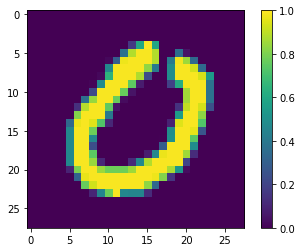

In [10]:
plt.imshow(pic.reshape([28,28]))
plt.colorbar()

In [11]:
def make_pix_pic(coords=(14,14)):
    init_pic = np.zeros(784)
    init_pic = init_pic.reshape([28,28])
    init_pic[coords] = 0.99
    return init_pic.reshape(784)

In [12]:
init_pic = np.zeros(784)
init_pic = init_pic.reshape([28,28])
init_pic[14, 10] = 0.9

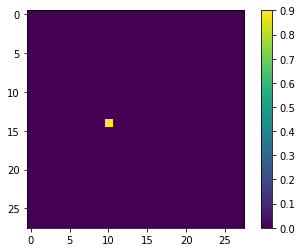

In [13]:
plt.imshow(init_pic)
plt.colorbar()

# Let's compute the geodesics..

In [14]:
def norm(x):
    return np.sqrt(np.sum(x**2))

In [15]:
def callbak(x,convergence):
    print('x is: ', x)
    print('val is: ', convergence)

In [16]:
te=optimize.differential_evolution(norm, bounds=[(0,1), (0,1), (0,1), (0.1,1)], disp=True)

differential_evolution step 1: f(x)= 0.394071
differential_evolution step 2: f(x)= 0.394071
differential_evolution step 3: f(x)= 0.275355
differential_evolution step 4: f(x)= 0.157913
differential_evolution step 5: f(x)= 0.157913
differential_evolution step 6: f(x)= 0.136267
differential_evolution step 7: f(x)= 0.136267
differential_evolution step 8: f(x)= 0.107243
differential_evolution step 9: f(x)= 0.107243
differential_evolution step 10: f(x)= 0.107243
differential_evolution step 11: f(x)= 0.107243
differential_evolution step 12: f(x)= 0.107243
differential_evolution step 13: f(x)= 0.107243
differential_evolution step 14: f(x)= 0.107243
differential_evolution step 15: f(x)= 0.107243
differential_evolution step 16: f(x)= 0.103571
differential_evolution step 17: f(x)= 0.103571
differential_evolution step 18: f(x)= 0.103571
differential_evolution step 19: f(x)= 0.103571
differential_evolution step 20: f(x)= 0.103571
differential_evolution step 21: f(x)= 0.103571
differential_evolution

In [17]:
te

     fun: 0.1
     jac: array([5.13478149e-08, 5.13478149e-08, 5.13478149e-08, 9.99999999e-01])
 message: 'Optimization terminated successfully.'
    nfev: 3010
     nit: 49
 success: True
       x: array([0. , 0. , 0. , 0.1])

In [18]:
def shift_pic(pic, shift=4):
    return np.roll(pic.reshape([28,28]), shift, axis=1).reshape([784,])

In [19]:
def apply_scalar_padding(x, unpadded_coords=[(14,15)]):
    pic = np.zeros([28, 28])
    pic[unpadded_coords] = x
    return pic.reshape(784)

In [20]:
def apply_padding(x, unpadded_coords=[(14, 13), (14,14), (14,15)]):
    #pic = np.zeros([28, 28])
    pic = 1/100.*np.random.rand(28, 28)
    for i, coords in enumerate(unpadded_coords):
        pic[coords] = x[i]
    return pic.reshape(784)

In [21]:
def create_vec_tensor(categories, target = y_conv_s):
    vec_tens = []
    for i in range(categories):
            vec_tens.append(tf.gradients(target[:,i], x)[0])
    return vec_tens

In [22]:
vec_tens = create_vec_tensor(10)
def compute_vec_grad(pic, vec_tens):
    var_grad = sess.run(vec_tens, feed_dict={x: pic.reshape([1,len(pic)]), keep_prob: 1.0})
    return np.asarray(var_grad).reshape([10, 784])

In [23]:
def compute_metric(pic, compute_vec_grad=compute_vec_grad, alpha=0.0, beta=1.0):
    vec_grad = compute_vec_grad(pic, vec_tens)
    #vec_grad = vec_grad/np.sqrt(np.sum(vec_grad**2, axis=1)).reshape([10,1])
    return alpha*np.identity(784) + beta*np.dot(np.transpose(vec_grad),vec_grad)

In [24]:
def interp_integrand(start_pic, end_pic, t, metric=compute_metric):
    curr_pic = (1-t)*start_pic + t*end_pic 
    return np.sqrt( np.dot( np.dot(end_pic-start_pic, metric(curr_pic)), end_pic-start_pic))

In [25]:
def mid_func(midpoint, startpoint, endpoint, metric=compute_metric):
    i = integrate.romberg(lambda t: interp_integrand(startpoint, midpoint, t) + interp_integrand(midpoint, endpoint, t),0,1, tol=1, rtol=1e-4)
    return i

In [26]:
def distance_geod(geod):
    print("integrating geodesic")
    length = 0
    for i in range(len(geod)-1):
        length+=integrate.romberg(lambda t: interp_integrand(geod[i], geod[i+1], t), 0, 1, tol=1, rtol=1e-4)

    return length

In [27]:
def minimize_length_step(point_index, geod):
    bounds = [(0,1)]*3
    print('begin diff evolution')
    soln = optimize.differential_evolution(lambda x: mid_func(apply_padding(x), geod[point_index-1,:], geod[point_index+1,:]), bounds=bounds, maxiter=100,popsize=30, recombination=1, disp=True)
    print('end diff evolution')
    print('result was: ', soln['x'])
    return np.asarray(apply_padding(soln['x']))

In [28]:
#returns the geodesic with first index being the pt index and second being the actual point (or picture in the mnist case)
def divide(startpoint, endpoint, num_div):
    pt_divs = np.linspace(0, 1, num=num_div)

    geod = np.ones(len(pt_divs)).reshape([len(pt_divs),1])*startpoint.reshape([1,len(startpoint)]) + pt_divs.reshape([len(pt_divs),1])*(endpoint-startpoint).reshape([1,len(startpoint)])
    for pt_index in range(len(pt_divs))[1:-1]:
        geod[pt_index] = make_pix_pic(coords=(14,14))
    return pt_divs, geod

def compute_geodesic(startpoint, endpoint, num_div, num_passes=2):
    grid, geod = divide(startpoint, endpoint, num_div)
    length_pass = []
    length_pass.append(distance_geod(geod))
    for n in range(num_passes):
        r=np.arange(len(grid))[1:-1]
        np.random.shuffle(r)
        for pt_index in r:
            geod[pt_index] = minimize_length_step(pt_index, geod)
        length_pass.append(distance_geod(geod))
    return geod, length_pass

In [29]:
start_pic = shift_pic(make_pix_pic(),shift=-1)
end_pic =  shift_pic(make_pix_pic(),shift=1)

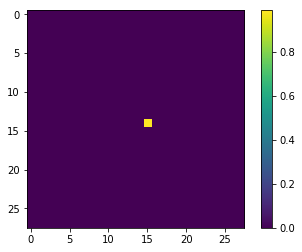

In [30]:
plt.imshow(end_pic.reshape([28,28]))
plt.colorbar()

In [31]:
# bounds = [(0,1)]*3

# soln = optimize.differential_evolution(lambda x: mid_func(apply_padding(x), start_pic, end_pic), bounds=[(0,1),(0,1),(0,1)], maxiter=100,popsize=30, recombination=1, disp=True)

In [32]:
# soln

In [33]:
g = compute_geodesic(start_pic, end_pic, num_div=5, num_passes=6)

integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.0656237
differential_evolution step 2: f(x)= 0.0616286
differential_evolution step 3: f(x)= 0.0603448
differential_evolution step 4: f(x)= 0.0603448
differential_evolution step 5: f(x)= 0.0603448
differential_evolution step 6: f(x)= 0.0517991
differential_evolution step 7: f(x)= 0.0494947
differential_evolution step 8: f(x)= 0.0494947
differential_evolution step 9: f(x)= 0.0490536
differential_evolution step 10: f(x)= 0.0398385
differential_evolution step 11: f(x)= 0.0398385
differential_evolution step 12: f(x)= 0.0398385
differential_evolution step 13: f(x)= 0.0398385
differential_evolution step 14: f(x)= 0.0376093
differential_evolution step 15: f(x)= 0.0376093
differential_evolution step 16: f(x)= 0.0376093
differential_evolution step 17: f(x)= 0.0376093
differential_evolution step 18: f(x)= 0.0376093
differential_evolution step 19: f(x)= 0.0376093
differential_evolution step 20: f(x)= 0.0376093
differe

differential_evolution step 71: f(x)= 0.119672
differential_evolution step 72: f(x)= 0.119672
differential_evolution step 73: f(x)= 0.119672
differential_evolution step 74: f(x)= 0.119672
differential_evolution step 75: f(x)= 0.119672
differential_evolution step 76: f(x)= 0.119672
differential_evolution step 77: f(x)= 0.119672
differential_evolution step 78: f(x)= 0.119672
differential_evolution step 79: f(x)= 0.119672
differential_evolution step 80: f(x)= 0.119672
differential_evolution step 81: f(x)= 0.119672
differential_evolution step 82: f(x)= 0.119672
differential_evolution step 83: f(x)= 0.119672
differential_evolution step 84: f(x)= 0.119672
differential_evolution step 85: f(x)= 0.119672
differential_evolution step 86: f(x)= 0.117984
differential_evolution step 87: f(x)= 0.117984
differential_evolution step 88: f(x)= 0.117984
differential_evolution step 89: f(x)= 0.117984
differential_evolution step 90: f(x)= 0.117984
differential_evolution step 91: f(x)= 0.117984
differential_

differential_evolution step 41: f(x)= 0.025786
differential_evolution step 42: f(x)= 0.025786
differential_evolution step 43: f(x)= 0.025786
differential_evolution step 44: f(x)= 0.025786
differential_evolution step 45: f(x)= 0.025786
differential_evolution step 46: f(x)= 0.025786
differential_evolution step 47: f(x)= 0.025786
differential_evolution step 48: f(x)= 0.025786
differential_evolution step 49: f(x)= 0.025786
differential_evolution step 50: f(x)= 0.025786
differential_evolution step 51: f(x)= 0.025786
differential_evolution step 52: f(x)= 0.025786
differential_evolution step 53: f(x)= 0.025786
differential_evolution step 54: f(x)= 0.025786
differential_evolution step 55: f(x)= 0.025786
differential_evolution step 56: f(x)= 0.025786
differential_evolution step 57: f(x)= 0.025786
differential_evolution step 58: f(x)= 0.025786
differential_evolution step 59: f(x)= 0.025786
differential_evolution step 60: f(x)= 0.025786
differential_evolution step 61: f(x)= 0.025786
differential_

differential_evolution step 13: f(x)= 0.135891
differential_evolution step 14: f(x)= 0.135891
differential_evolution step 15: f(x)= 0.135891
differential_evolution step 16: f(x)= 0.132895
differential_evolution step 17: f(x)= 0.132895
differential_evolution step 18: f(x)= 0.132895
differential_evolution step 19: f(x)= 0.132895
differential_evolution step 20: f(x)= 0.132895
differential_evolution step 21: f(x)= 0.132895
differential_evolution step 22: f(x)= 0.132895
differential_evolution step 23: f(x)= 0.132895
differential_evolution step 24: f(x)= 0.132895
differential_evolution step 25: f(x)= 0.132895
differential_evolution step 26: f(x)= 0.132895
differential_evolution step 27: f(x)= 0.132895
differential_evolution step 28: f(x)= 0.132895
differential_evolution step 29: f(x)= 0.132895
differential_evolution step 30: f(x)= 0.132895
differential_evolution step 31: f(x)= 0.132895
differential_evolution step 32: f(x)= 0.130119
differential_evolution step 33: f(x)= 0.126825
differential_

differential_evolution step 86: f(x)= 0.125972
differential_evolution step 87: f(x)= 0.125972
differential_evolution step 88: f(x)= 0.125972
differential_evolution step 89: f(x)= 0.125972
differential_evolution step 90: f(x)= 0.125972
differential_evolution step 91: f(x)= 0.125972
differential_evolution step 92: f(x)= 0.125972
differential_evolution step 93: f(x)= 0.125972
differential_evolution step 94: f(x)= 0.125972
differential_evolution step 95: f(x)= 0.125972
differential_evolution step 96: f(x)= 0.125972
differential_evolution step 97: f(x)= 0.125972
differential_evolution step 98: f(x)= 0.125972
differential_evolution step 99: f(x)= 0.125972
differential_evolution step 100: f(x)= 0.125972
end diff evolution
result was:  [0.29762453 0.94169061 0.09360145]
begin diff evolution
differential_evolution step 1: f(x)= 0.163322
differential_evolution step 2: f(x)= 0.155096
differential_evolution step 3: f(x)= 0.155096
differential_evolution step 4: f(x)= 0.137919
differential_evolution

differential_evolution step 56: f(x)= 0.0622394
differential_evolution step 57: f(x)= 0.0622394
differential_evolution step 58: f(x)= 0.0622394
differential_evolution step 59: f(x)= 0.0622394
differential_evolution step 60: f(x)= 0.0622394
differential_evolution step 61: f(x)= 0.0622394
differential_evolution step 62: f(x)= 0.0622394
differential_evolution step 63: f(x)= 0.0622394
differential_evolution step 64: f(x)= 0.0622394
differential_evolution step 65: f(x)= 0.0622394
differential_evolution step 66: f(x)= 0.0622394
differential_evolution step 67: f(x)= 0.0622394
differential_evolution step 68: f(x)= 0.0622394
differential_evolution step 69: f(x)= 0.061303
differential_evolution step 70: f(x)= 0.061303
differential_evolution step 71: f(x)= 0.061303
differential_evolution step 72: f(x)= 0.061303
differential_evolution step 73: f(x)= 0.061303
differential_evolution step 74: f(x)= 0.061303
differential_evolution step 75: f(x)= 0.061303
differential_evolution step 76: f(x)= 0.061303


differential_evolution step 24: f(x)= 0.0746341
differential_evolution step 25: f(x)= 0.0733516
differential_evolution step 26: f(x)= 0.0733516
differential_evolution step 27: f(x)= 0.0733516
differential_evolution step 28: f(x)= 0.0733516
differential_evolution step 29: f(x)= 0.0733516
differential_evolution step 30: f(x)= 0.0733516
differential_evolution step 31: f(x)= 0.0733516
differential_evolution step 32: f(x)= 0.0725513
differential_evolution step 33: f(x)= 0.0725513
differential_evolution step 34: f(x)= 0.0725513
differential_evolution step 35: f(x)= 0.0722239
differential_evolution step 36: f(x)= 0.0722239
differential_evolution step 37: f(x)= 0.0717236
differential_evolution step 38: f(x)= 0.0687555
differential_evolution step 39: f(x)= 0.0687555
differential_evolution step 40: f(x)= 0.0687555
differential_evolution step 41: f(x)= 0.0687555
differential_evolution step 42: f(x)= 0.0687555
differential_evolution step 43: f(x)= 0.0687555
differential_evolution step 44: f(x)= 0.

differential_evolution step 95: f(x)= 0.120764
differential_evolution step 96: f(x)= 0.120764
differential_evolution step 97: f(x)= 0.120764
differential_evolution step 98: f(x)= 0.120764
differential_evolution step 99: f(x)= 0.120764
differential_evolution step 100: f(x)= 0.120764
end diff evolution
result was:  [0.26425765 0.85427232 0.2928535 ]
integrating geodesic
begin diff evolution
differential_evolution step 1: f(x)= 0.107843
differential_evolution step 2: f(x)= 0.107843
differential_evolution step 3: f(x)= 0.0908522
differential_evolution step 4: f(x)= 0.0902502
differential_evolution step 5: f(x)= 0.0854731
differential_evolution step 6: f(x)= 0.0822788
differential_evolution step 7: f(x)= 0.0741035
differential_evolution step 8: f(x)= 0.0741035
differential_evolution step 9: f(x)= 0.0741035
differential_evolution step 10: f(x)= 0.0736523
differential_evolution step 11: f(x)= 0.0729712
differential_evolution step 12: f(x)= 0.0729712
differential_evolution step 13: f(x)= 0.072

differential_evolution step 63: f(x)= 0.0420809
differential_evolution step 64: f(x)= 0.0420809
differential_evolution step 65: f(x)= 0.0420809
differential_evolution step 66: f(x)= 0.0420809
differential_evolution step 67: f(x)= 0.0420809
differential_evolution step 68: f(x)= 0.0420809
differential_evolution step 69: f(x)= 0.0420809
differential_evolution step 70: f(x)= 0.0420809
differential_evolution step 71: f(x)= 0.0420809
differential_evolution step 72: f(x)= 0.0420809
differential_evolution step 73: f(x)= 0.0420809
differential_evolution step 74: f(x)= 0.0420809
differential_evolution step 75: f(x)= 0.0420809
differential_evolution step 76: f(x)= 0.0420809
differential_evolution step 77: f(x)= 0.0420809
differential_evolution step 78: f(x)= 0.0420809
differential_evolution step 79: f(x)= 0.0420809
differential_evolution step 80: f(x)= 0.0420809
differential_evolution step 81: f(x)= 0.0420809
differential_evolution step 82: f(x)= 0.0420809
differential_evolution step 83: f(x)= 0.

differential_evolution step 34: f(x)= 0.134084
differential_evolution step 35: f(x)= 0.134084
differential_evolution step 36: f(x)= 0.134084
differential_evolution step 37: f(x)= 0.134084
differential_evolution step 38: f(x)= 0.134084
differential_evolution step 39: f(x)= 0.134084
differential_evolution step 40: f(x)= 0.134084
differential_evolution step 41: f(x)= 0.134084
differential_evolution step 42: f(x)= 0.134084
differential_evolution step 43: f(x)= 0.134084
differential_evolution step 44: f(x)= 0.134084
differential_evolution step 45: f(x)= 0.134084
differential_evolution step 46: f(x)= 0.134084
differential_evolution step 47: f(x)= 0.134084
differential_evolution step 48: f(x)= 0.134084
differential_evolution step 49: f(x)= 0.134084
differential_evolution step 50: f(x)= 0.134084
differential_evolution step 51: f(x)= 0.134084
differential_evolution step 52: f(x)= 0.134084
differential_evolution step 53: f(x)= 0.134084
differential_evolution step 54: f(x)= 0.134084
differential_

differential_evolution step 5: f(x)= 0.0399763
differential_evolution step 6: f(x)= 0.0397106
differential_evolution step 7: f(x)= 0.039094
differential_evolution step 8: f(x)= 0.0360793
differential_evolution step 9: f(x)= 0.0360793
differential_evolution step 10: f(x)= 0.0360793
differential_evolution step 11: f(x)= 0.0360793
differential_evolution step 12: f(x)= 0.0360793
differential_evolution step 13: f(x)= 0.0360793
differential_evolution step 14: f(x)= 0.0350592
differential_evolution step 15: f(x)= 0.0350592
differential_evolution step 16: f(x)= 0.0350592
differential_evolution step 17: f(x)= 0.0350592
differential_evolution step 18: f(x)= 0.0350592
differential_evolution step 19: f(x)= 0.0350592
differential_evolution step 20: f(x)= 0.0350592
differential_evolution step 21: f(x)= 0.0344766
differential_evolution step 22: f(x)= 0.0344766
differential_evolution step 23: f(x)= 0.0344766
differential_evolution step 24: f(x)= 0.0344766
differential_evolution step 25: f(x)= 0.034476

In [34]:
g[0].shape

(5, 784)

vals:  [0.99 0.   0.  ]


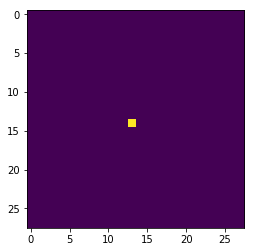

vals:  [0.31847313 0.82944877 0.23850814]


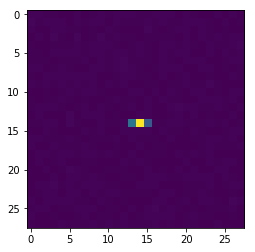

vals:  [0.23170486 0.22135784 0.84704579]


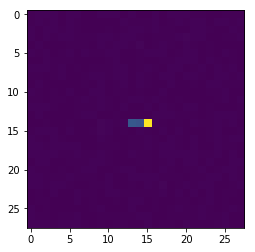

vals:  [0.16420746 0.11735621 0.9304179 ]


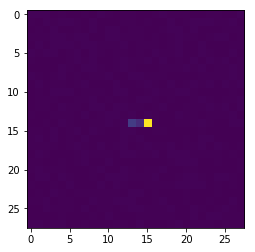

vals:  [0.   0.   0.99]


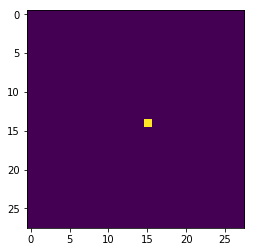

IndexError: index 5 is out of bounds for axis 0 with size 5

In [35]:
for i in range(10):
    print('vals: ', (g[0][i,:].reshape([28,28])[14,13:16]))
    plt.imshow(g[0][i,:].reshape([28,28]))
    plt.show()

In [36]:
g[1]

[0.3782344663546075,
 0.2869183086938575,
 0.2808386172205925,
 0.251930638363157,
 0.21552276923914707,
 0.23698031888282384,
 0.27216795634320157]

In [ ]:
g[1]